In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

from PIL import Image

import face_recognition as fr

import matplotlib.font_manager as fm


In [2]:
import face_recognition as fr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [3]:
folder_list = glob.glob('data/*')
folder_list

['data\\강철의연금술사',
 'data\\고스트바둑왕',
 'data\\나루토캐릭터',
 'data\\도라에몽',
 'data\\드래곤볼',
 'data\\블리치',
 'data\\원피스캐릭터',
 'data\\이뉴야샤',
 'data\\일곱개의대죄',
 'data\\코난',
 'data\\포켓몬스터']

In [36]:
image_list = glob.glob('data/만화짱/*')
image_list

['data/만화짱\\만화짱1.jpg',
 'data/만화짱\\만화짱10.jpg',
 'data/만화짱\\만화짱100.jpg',
 'data/만화짱\\만화짱101.jpg',
 'data/만화짱\\만화짱102.jpg',
 'data/만화짱\\만화짱103.jpg',
 'data/만화짱\\만화짱104.jpg',
 'data/만화짱\\만화짱105.jpg',
 'data/만화짱\\만화짱106.jpg',
 'data/만화짱\\만화짱107.jpg',
 'data/만화짱\\만화짱108.jpg',
 'data/만화짱\\만화짱109.jpg',
 'data/만화짱\\만화짱11.jpg',
 'data/만화짱\\만화짱110.jpg',
 'data/만화짱\\만화짱111.jpg',
 'data/만화짱\\만화짱112.jpg',
 'data/만화짱\\만화짱113.jpg',
 'data/만화짱\\만화짱114.jpg',
 'data/만화짱\\만화짱115.jpg',
 'data/만화짱\\만화짱116.jpg',
 'data/만화짱\\만화짱117.jpg',
 'data/만화짱\\만화짱118.jpg',
 'data/만화짱\\만화짱119.jpg',
 'data/만화짱\\만화짱12.jpg',
 'data/만화짱\\만화짱120.jpg',
 'data/만화짱\\만화짱121.jpg',
 'data/만화짱\\만화짱122.jpg',
 'data/만화짱\\만화짱123.jpg',
 'data/만화짱\\만화짱124.jpg',
 'data/만화짱\\만화짱125.jpg',
 'data/만화짱\\만화짱126.jpg',
 'data/만화짱\\만화짱127.jpg',
 'data/만화짱\\만화짱128.jpg',
 'data/만화짱\\만화짱129.jpg',
 'data/만화짱\\만화짱13.jpg',
 'data/만화짱\\만화짱130.jpg',
 'data/만화짱\\만화짱131.jpg',
 'data/만화짱\\만화짱132.jpg',
 'data/만화짱\\만화짱133.jpg',
 'data/만화짱\\만화짱134.jpg',
 'data

In [37]:
image_list = glob.glob('data/만화짱/*')
for image_path in image_list:
    image = fr.load_image_file(image_path)
    try:
        cropped_image = get_cropped_face(image)
    except Exception as e:
        os.remove(image_path)
print('Completed')

Completed


In [55]:
cropped_image_list = []
for folder in folder_list:
    for image_path in glob.glob(folder + '/*'):
        image = fr.load_image_file(image_path)
        try:
            cropped_image = get_cropped_face(image)
            cropped_image_list.append(cropped_image)
        except Exception as e:
            os.remove(image_path)
    print(folder.split('\\')[-1], 'Completed')

data\강철의연금술사 Completed
data\고스트바둑왕 Completed
data\나루토캐릭터 Completed
data\도라에몽 Completed
data\드래곤볼 Completed
data\블리치 Completed
data\원피스캐릭터 Completed
data\이뉴야샤 Completed
data\일곱개의대죄 Completed
data\코난 Completed
data\포켓몬스터 Completed


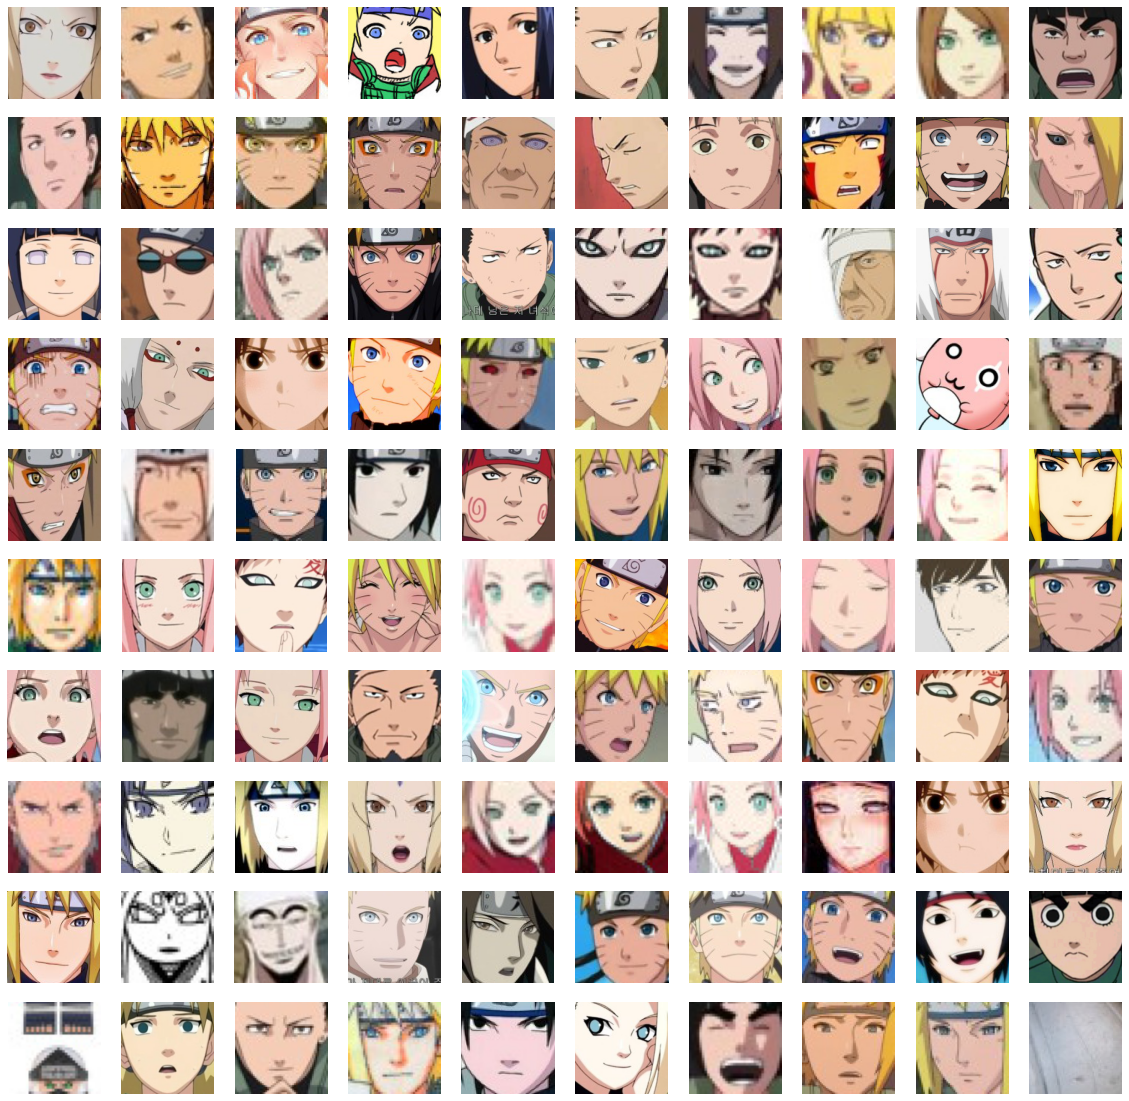

In [29]:
plt.figure(figsize=(20,20))
for i, crop in enumerate(cropped_image_list[:100]):
    plt.subplot(10,10,i+1)
    plt.imshow(crop)
    plt.axis('off')

In [4]:
def get_name(image_path):
    file_name = image_path.split('\\')[-1]
    name = file_name.split('.')[0]
    
    return name

def get_cropped_face(image):
    face_location = fr.face_locations(image)
    top, right, bottom, left = face_location[0]
    cropped_image = image[top:bottom, left:right]
    
    return cropped_image

In [19]:
folder_list = glob.glob('data/*')

cropped_image_dict = {}
for folder in folder_list:
    for image_path in glob.glob(folder + '/*'):
        try:
            name = get_name(image_path)
            image = fr.load_image_file(image_path)

            face_locations = fr.face_locations(image)
            top, right, bottom, left = face_locations[0]
            cropped_image = image[top:bottom, left:right]
            cropped_image_dict[name] = cropped_image

        except:
            pass
    print(folder, 'Completed')

data\강철의연금술사 Completed
data\고스트바둑왕 Completed
data\나루토캐릭터 Completed
data\도라에몽 Completed
data\드래곤볼 Completed
data\블리치 Completed
data\원피스캐릭터 Completed
data\이뉴야샤 Completed
data\일곱개의대죄 Completed
data\코난 Completed
data\포켓몬스터 Completed


In [6]:
import pickle
with open('cropped_image.pkl', 'wb') as f:
    pickle.dump(cropped_image_dict, f)

with open('cropped_image.pkl', 'rb') as f:
    cropped_image_dict = pickle.load(f)

In [21]:
embedding_dict = {}
for i, data in enumerate(cropped_image_dict.items()):
    if (i % 50 == 0) or (i == len(cropped_image_dict)):
        print(i, 'Images Done....')
        
    name, face = data
    embedding = fr.face_encodings(face)
    if len(embedding) >= 1:
        embedding_dict[name] = em
    else:
        print(f'{name} Embedding Fail!')

0 Images Done....
강철의연금술사1140 Embedding Fail!
강철의연금술사1230 Embedding Fail!
강철의연금술사1360 Embedding Fail!
강철의연금술사1370 Embedding Fail!
강철의연금술사1380 Embedding Fail!
강철의연금술사1410 Embedding Fail!
강철의연금술사1600 Embedding Fail!
강철의연금술사1670 Embedding Fail!
강철의연금술사1670.1 Embedding Fail!
강철의연금술사1680 Embedding Fail!
강철의연금술사170 Embedding Fail!
강철의연금술사1700 Embedding Fail!
강철의연금술사1710 Embedding Fail!
강철의연금술사1710.1 Embedding Fail!
강철의연금술사1720 Embedding Fail!
강철의연금술사1740 Embedding Fail!
강철의연금술사1790 Embedding Fail!
강철의연금술사1790.1 Embedding Fail!
강철의연금술사1840 Embedding Fail!
강철의연금술사1850 Embedding Fail!
강철의연금술사1940 Embedding Fail!
강철의연금술사2010 Embedding Fail!
강철의연금술사2140 Embedding Fail!
강철의연금술사2200 Embedding Fail!
강철의연금술사2210 Embedding Fail!
강철의연금술사2220 Embedding Fail!
강철의연금술사2270 Embedding Fail!
강철의연금술사230 Embedding Fail!
강철의연금술사2300 Embedding Fail!
강철의연금술사2330 Embedding Fail!
강철의연금술사2340 Embedding Fail!
강철의연금술사2390.1 Embedding Fail!
강철의연금술사2400 Embedding Fail!
강철의연금술사2500 Embedding Fail!
강철의연금술사2530 Embedding Fa

나루토캐릭터600 Embedding Fail!
나루토캐릭터730 Embedding Fail!
나루토캐릭터910 Embedding Fail!
나루토캐릭터980 Embedding Fail!
도라에몽1590 Embedding Fail!
도라에몽1770 Embedding Fail!
도라에몽2400 Embedding Fail!
도라에몽2520 Embedding Fail!
도라에몽3090 Embedding Fail!
도라에몽4110 Embedding Fail!
도라에몽4720 Embedding Fail!
도라에몽750 Embedding Fail!
드래곤볼10 Embedding Fail!
드래곤볼10.1 Embedding Fail!
드래곤볼1290 Embedding Fail!
드래곤볼1420 Embedding Fail!
드래곤볼1420.1 Embedding Fail!
드래곤볼1470 Embedding Fail!
드래곤볼1500 Embedding Fail!
드래곤볼1580 Embedding Fail!
드래곤볼1690 Embedding Fail!
드래곤볼170 Embedding Fail!
드래곤볼1720 Embedding Fail!
드래곤볼1950 Embedding Fail!
드래곤볼2000 Embedding Fail!
드래곤볼2090 Embedding Fail!
드래곤볼2150.1 Embedding Fail!
드래곤볼2190 Embedding Fail!
드래곤볼2350 Embedding Fail!
드래곤볼2430 Embedding Fail!
드래곤볼2650 Embedding Fail!
드래곤볼2760 Embedding Fail!
드래곤볼2940 Embedding Fail!
450 Images Done....
드래곤볼3000.1 Embedding Fail!
드래곤볼3070 Embedding Fail!
드래곤볼3110 Embedding Fail!
드래곤볼3250 Embedding Fail!
드래곤볼3320 Embedding Fail!
드래곤볼3340 Embedding Fail!

일곱개의대죄430.1 Embedding Fail!
일곱개의대죄4410 Embedding Fail!
일곱개의대죄4480.2 Embedding Fail!
일곱개의대죄450 Embedding Fail!
일곱개의대죄4570 Embedding Fail!
일곱개의대죄4650 Embedding Fail!
일곱개의대죄4850 Embedding Fail!
일곱개의대죄490 Embedding Fail!
일곱개의대죄4950 Embedding Fail!
일곱개의대죄4960 Embedding Fail!
일곱개의대죄5090 Embedding Fail!
일곱개의대죄5160 Embedding Fail!
일곱개의대죄530 Embedding Fail!
일곱개의대죄530.1 Embedding Fail!
일곱개의대죄530.2 Embedding Fail!
850 Images Done....
일곱개의대죄610 Embedding Fail!
일곱개의대죄660 Embedding Fail!
일곱개의대죄920 Embedding Fail!
일곱개의대죄920.1 Embedding Fail!
코난1070 Embedding Fail!
코난1210 Embedding Fail!
코난1250 Embedding Fail!
코난1310 Embedding Fail!
코난1830 Embedding Fail!
코난1830.1 Embedding Fail!
코난220 Embedding Fail!
코난2330 Embedding Fail!
코난2390 Embedding Fail!
코난2390.1 Embedding Fail!
코난2580 Embedding Fail!
코난3060 Embedding Fail!
코난3240 Embedding Fail!
코난390 Embedding Fail!
코난4370 Embedding Fail!
코난4380 Embedding Fail!
코난4760.1 Embedding Fail!
코난4760.30000000000000004 Embedding Fail!
코난4760.5 Embedding Fail!
코난4760

In [22]:
import numpy as np

def get_distance(name1, name2):
    name1_embedding = embedding_dict[name1]
    name2_embedding = embedding_dict[name2]
    distance = np.linalg.norm(name1_embedding - name2_embedding, ord=2)
    
    return distance

def sort_key_value(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    
    return get_distance_from_name1

def get_nearest_face(name, top=5):
    key_value = sort_key_value(name)
    result = sorted(embedding_dict.items(), key=lambda x: key_value(x[0]))[1:top+1]
    
    top_distance = [get_distance(name, k) for k, v  in result]
    
    return result, top_distance

In [23]:
image_dir = glob.glob('*.jpg')

for image_path in image_dir:
    name = get_name(image_path)
    image = fr.load_image_file(image_path)
    
    cropped = get_cropped_face(image)
    cropped_image_dict[name] = cropped
    
    embedding = fr.face_encodings(cropped)
    embedding_dict[name] = embedding[0]
    
    print(f'{name} Finished...')

사공용협1 Finished...
사공용협2 Finished...
사공용협3 Finished...
사공용협_증명사진 Finished...
용협이_example Finished...


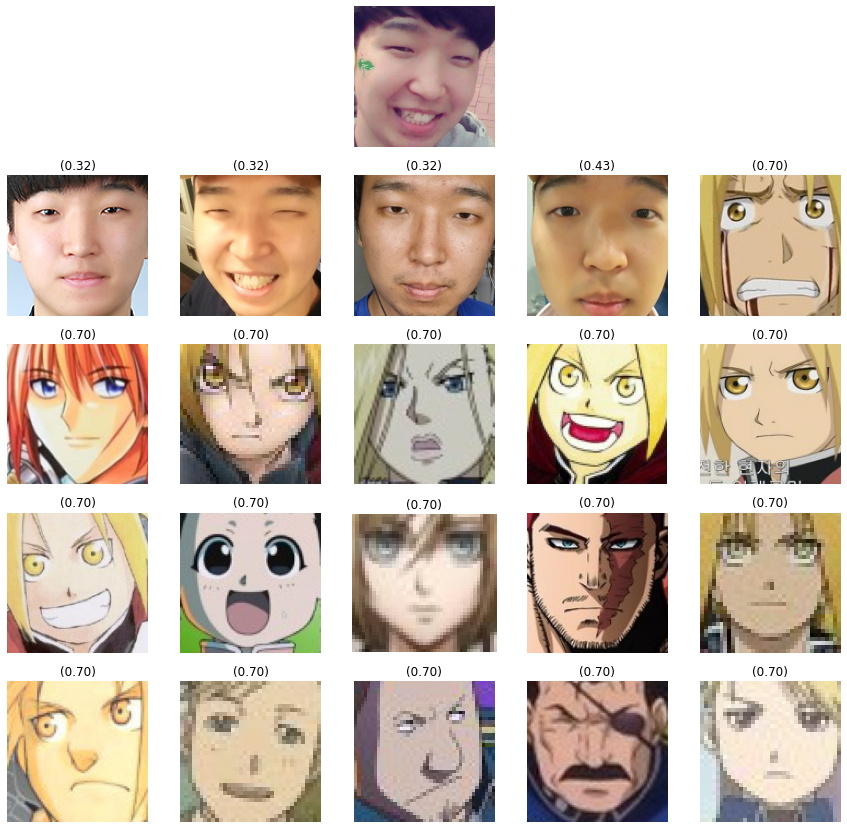

In [29]:
result, top_distance = get_nearest_face('용협이_example', top=20)

plt.figure(figsize=(15,15))

plt.subplot(5,5,3)
plt.imshow(cropped_image_dict['용협이_example'])
plt.axis('off')

for i, data in enumerate(result):
    name, embedding = data
    image = cropped_image_dict[name]
    plt.subplot(5,5,5+i+1)
    plt.imshow(image)
    plt.title(f'({top_distance[i]:0.2f})')
    plt.axis('off')

In [30]:
embedding_dict.keys()

dict_keys(['강철의연금술사1000', '강철의연금술사1010', '강철의연금술사1080', '강철의연금술사1110', '강철의연금술사1250', '강철의연금술사130', '강철의연금술사2130', '강철의연금술사2340.1', '강철의연금술사2390', '강철의연금술사2670', '강철의연금술사2870', '강철의연금술사2920', '강철의연금술사2930', '강철의연금술사3410', '강철의연금술사3520.1', '강철의연금술사3660', '강철의연금술사3820.1', '강철의연금술사4050', '강철의연금술사4110', '강철의연금술사4380', '강철의연금술사4540', '강철의연금술사5100', '강철의연금술사520', '고스트바둑왕1310', '고스트바둑왕1460', '고스트바둑왕1730', '고스트바둑왕1730.1', '고스트바둑왕1730.2', '고스트바둑왕1870', '고스트바둑왕1940', '고스트바둑왕2190', '고스트바둑왕2960', '고스트바둑왕3420', '고스트바둑왕3440', '고스트바둑왕3610', '고스트바둑왕3650', '고스트바둑왕3950', '고스트바둑왕3950.1', '고스트바둑왕3950.2', '고스트바둑왕3950.30000000000000004', '고스트바둑왕3950.4', '고스트바둑왕3960.1', '고스트바둑왕4290', '고스트바둑왕4340', '고스트바둑왕4350', '고스트바둑왕4490', '고스트바둑왕4530', '고스트바둑왕4560', '고스트바둑왕4790', '고스트바둑왕4830', '고스트바둑왕4840', '고스트바둑왕4860', '고스트바둑왕60', '고스트바둑왕640', '고스트바둑왕760', '나루토캐릭터1030', '나루토캐릭터1220', '나루토캐릭터130', '나루토캐릭터1470', '나루토캐릭터150', '나루토캐릭터1530', '나루토캐릭터160', '나루토캐릭터1680', '나루토캐릭터1750', '나루토캐릭터1810', '나루토캐릭터1890', '나루토캐릭터1920', '